### Классификация: Abalone Dataset

https://github.com/jbrownlee/Datasets/blob/master/abalone.csv

Этот набор данных содержит информацию о физических характеристиках морских ушек, таких как длина, диаметр и масса, и используется для предсказания возраста ушек на основе количества колец. Мы применяем алгоритм K-Nearest Neighbors (KNN) для классификации.

_Актуальность задачи_:
- Определение возраста морских ушек важно для управления ресурсами и устойчивого рыболовства. Автоматическое предсказание возраста может помочь биологам и рыбакам в оценке популяции без необходимости физического подсчета колец.
- Применение алгоритма KNN позволяет находить ушки с аналогичными характеристиками, что способствует более точному предсказанию возраста.
- Это может помочь в принятии решений о том, какие ушки можно собирать, а какие следует оставить для дальнейшего роста.

### Регрессия: Food delivery time Dataset

https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction

Этот набор данных используется для предсказания времени доставки еды на основе различных параметров заказа, таких как время заказа и расстояние до клиента, с использованием линейной регрессии.

_Актуальность задачи_:
- Предсказание времени доставки может улучшить логистику и повысить удовлетворенность клиентов в службах доставки еды, что особенно важно в условиях высокой конкуренции на рынке.
- Анализ данных о заказах и их связи с временем доставки может выявить узкие места в процессе и предложить пути для оптимизации.
- Это может помочь компаниям в планировании ресурсов и улучшении качества обслуживания клиентов.

Обе задачи имеют практическое значение и демонстрируют применение методов машинного обучения в реальных сценариях.


### Классификация

Для задачи классификации возраста морских ушек мы выберем метрику accuracy_score. Эта метрика оценивает точность классификации, показывая долю правильно предсказанных возрастов. accuracy_score обеспечит сбалансированную оценку качества модели и позволит эффективно работать в условиях, когда необходимо различать несколько возрастных категорий.

### Регрессия

Для задачи регрессии, связанной с предсказанием времени доставки еды, мы будем использовать Mean Absolute Error (MAE). Эта метрика измеряет среднюю абсолютную ошибку предсказаний, что делает её легко интерпретируемой, так как она сохраняет ту же размерность, что и целевая переменная — время. MAE позволяет одинаково учитывать все ошибки и устойчива к выбросам, что важно для точной оценки моделей, работающих с временными данными.

# Начало работы с данными

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from scipy.spatial.distance import euclidean, cityblock, chebyshev
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor

### Классификация: Abalone Dataset

загружаем датасет

In [24]:
abalone = pd.read_csv('./abalone.csv')

смотрим на распределение столбца качества в нём

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64


<Axes: >

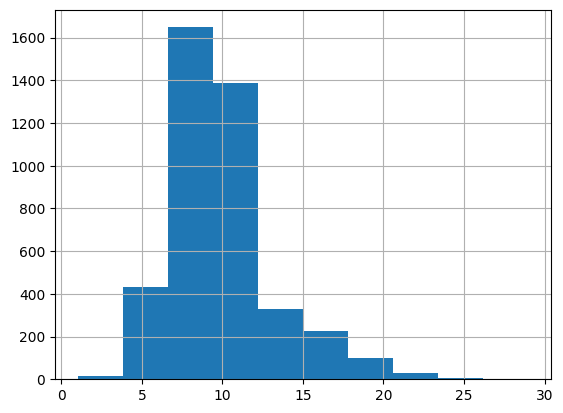

In [25]:
print(abalone.Rings.value_counts())
abalone.Rings.hist()

проверяем пустые значения

In [26]:
abalone.isna().sum()

Sex         0
Length      0
Diameter    0
Height      0
Whole       0
Shucked     0
Viscera     0
Shell       0
Rings       0
dtype: int64

создадим корреляционную матрицу для датасета

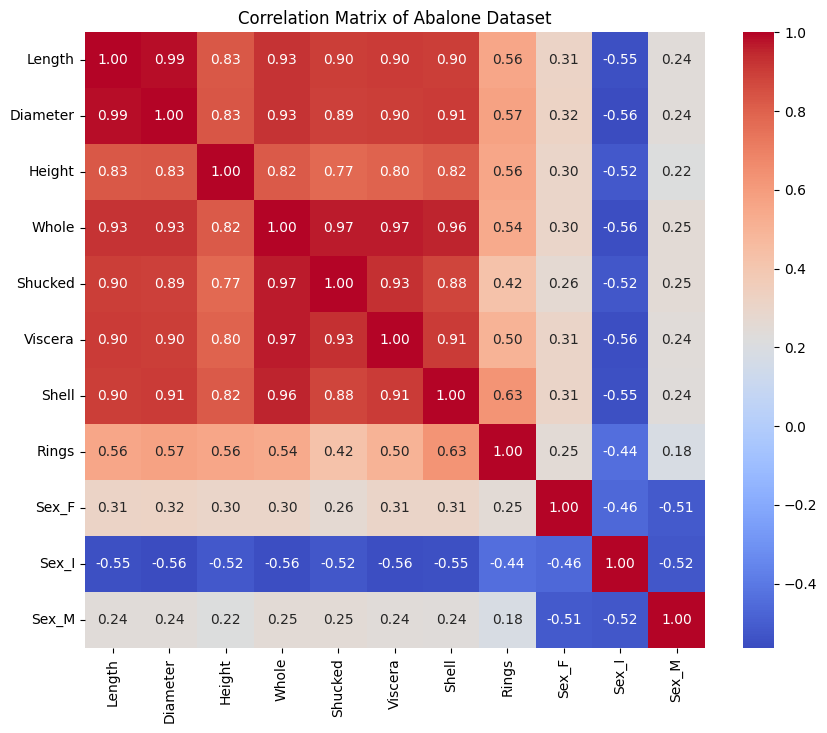

In [29]:
abalone_encoded = pd.get_dummies(abalone, columns=['Sex'])
corr_matrix = abalone_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Abalone Dataset')
plt.show()

На основе построенной корреляционной матрицы для набора данных Abalone можно сделать следующие выводы:


1) Высокая положительная корреляция наблюдается между переменными Length, Diameter, и Height. Это указывает на то, что размеры морских ушек тесно связаны друг с другом, что логично, так как они представляют физические измерения одного объекта.

2) Положительная корреляция между Shell и Rings (0.63) указывает на то, что масса раковины может быть индикатором возраста ушка, так как количество колец связано с возрастом.

3) Отрицательная корреляция между Sex_I и другими переменными, такими как Length, Diameter, и Height, может указывать на то, что неопределенный пол (I) связан с меньшими размерами ушек.

4) Слабая корреляция между Rings и другими переменными, такими как Whole, Shucked, и Viscera, говорит о том, что эти параметры в меньшей степени влияют на количество колец, и, следовательно, на возраст.

Эти наблюдения могут помочь в понимании того, какие физические характеристики наиболее значимы для оценки возраста морских ушек и как они взаимосвязаны.

разбиваем датасет на выборки

In [30]:
Abalone_X = abalone_encoded.drop('Rings', axis=1)
Abalone_y = abalone_encoded['Rings']

abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test = train_test_split(Abalone_X, Abalone_y, test_size=0.2, random_state=69)

print(f"Размер обучающей выборки: {abalone_X_train.shape}")
print(f"Размер тестовой выборки: {abalone_X_test.shape}")

Размер обучающей выборки: (3341, 10)
Размер тестовой выборки: (836, 10)


### Классификация: Food delivery time Dataset

загружаем датасет

In [61]:
times = pd.read_csv('./Food_Delivery_Times.csv')

смотрим на распределение столбца качества в нём

In [62]:
times.head(4)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37


проверяем пустые значения

In [63]:
times_prep = pd.get_dummies(times, drop_first=True)
times_prep.isna().sum()


Order_ID                   0
Distance_km                0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
Weather_Foggy              0
Weather_Rainy              0
Weather_Snowy              0
Weather_Windy              0
Traffic_Level_Low          0
Traffic_Level_Medium       0
Time_of_Day_Evening        0
Time_of_Day_Morning        0
Time_of_Day_Night          0
Vehicle_Type_Car           0
Vehicle_Type_Scooter       0
dtype: int64

есть пустые значения, заполним их средними значениями и проверим заново

In [64]:
times_prep['Courier_Experience_yrs'].fillna(times_prep['Courier_Experience_yrs'].mean(), inplace=True)
missing_values = times_prep.isna().sum()
print(missing_values)

Order_ID                  0
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Traffic_Level_Low         0
Traffic_Level_Medium      0
Time_of_Day_Evening       0
Time_of_Day_Morning       0
Time_of_Day_Night         0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
dtype: int64


/var/folders/_z/k3bvl54x1f52ctnlwpvx4hkh0000gn/T/ipykernel_29872/1563430028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  times_prep['Courier_Experience_yrs'].fillna(times_prep['Courier_Experience_yrs'].mean(), inplace=True)


создадим корреляционную матрицу для датасета

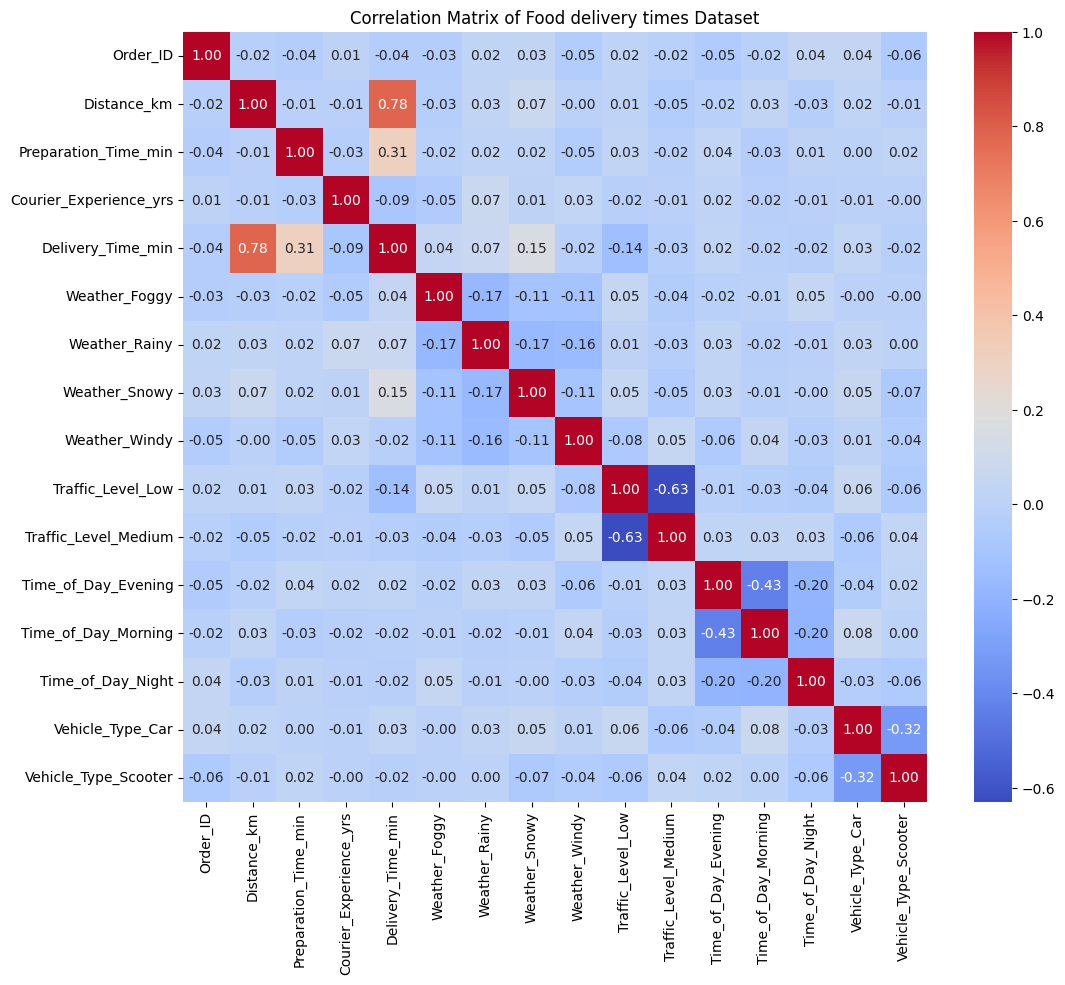

In [65]:
corr_matrix = times_prep.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Food delivery times Dataset')
plt.show()


На основе корреляционной матрицы можно сделать следующие выводы:

1. Расстояние ("Distance_km"): Имеет высокую положительную корреляцию с временем доставки ("Delivery_Time_min"). Это указывает на то, что увеличение расстояния значительно увеличивает время доставки.

2. Время подготовки ("Preparation_Time_min"): Показало умеренную положительную корреляцию с временем доставки (0.31), что подразумевает, что более длительное время подготовки может увеличивать общее время доставки.

3. Опыт курьера ("Courier_Experience_yrs"): Имеет слабую положительную корреляцию с временем доставки, что может указывать на незначительное влияние опыта на скорость доставки.

4. Уровень трафика ("Traffic_Level_Medium"): Показал отрицательную корреляцию с временем доставки, что может указывать на то, что средний уровень трафика снижает время доставки по сравнению с низким уровнем.

Эти наблюдения помогут сосредоточиться на значимых факторах при построении модели для прогнозирования времени доставки еды.

разбиваем датасет на выборки

In [68]:
print(times_prep.columns)

times_X = times_prep.drop('Delivery_Time_min', axis=1)
times_y = times_prep['Delivery_Time_min']

times_X_train, times_X_test, times_y_train, times_y_test = train_test_split(times_X, times_y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {times_X_train.shape}")
print(f"Размер тестовой выборки: {times_X_test.shape}")

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min', 'Weather_Foggy',
       'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Traffic_Level_Low',
       'Traffic_Level_Medium', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter'],
      dtype='object')
Размер обучающей выборки: (800, 15)
Размер тестовой выборки: (200, 15)


# Лабораторная №1 (KNN)

## Классификация

### Бейзлайн классификации

In [44]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=20))
])


pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"KNN Baseline Accuracy: {accuracy_score(abalone_y_test, abalone_y_pred)}")

KNN Baseline Accuracy: 0.2511961722488038


#### Подбор параметров

запустим GridSearchCV для перебора гиперпараметров

In [50]:
param_grid = {
    'classifier__n_neighbors': range(2, 100),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(abalone_X_train, abalone_y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая точность на кросс-валидации: {best_score}")

abalone_y_pred = grid_search.predict(abalone_X_test)
test_accuracy = accuracy_score(abalone_y_test, abalone_y_pred)
print(f"Точность на тестовом наборе: {test_accuracy}")

/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры: {'classifier__n_neighbors': 69}
Лучшая точность на кросс-валидации: 0.2744739221109351
Точность на тестовом наборе: 0.24043062200956938


### Собственная имплементация

In [51]:
class KNNBase(BaseEstimator):
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes_ = np.unique(y)
        return self

    def _get_distance(self, a, b):
        if self.metric == 'euclidean':
            return euclidean(a, b)
        elif self.metric == 'manhattan':
            return cityblock(a, b)
        elif self.metric == 'chebyshev':
            return chebyshev(a, b)
        else:
            raise ValueError(f"Неизвестная метрика: {self.metric}")

    def _get_neighbors(self, x):
        distances = np.array([self._get_distance(x, xi) for xi in self.X_train])
        return np.argsort(distances)[:self.n_neighbors]



In [52]:
class KNNClassifier(KNNBase, ClassifierMixin):
    def __init__(self, n_neighbors=5, metric='euclidean'):
        super().__init__(n_neighbors=n_neighbors, metric=metric)

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            nearest_indices = self._get_neighbors(x)
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_values).argmax())

        return np.array(predictions)

#### Бейзлайн классификации

In [53]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNNClassifier(n_neighbors=4))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"Custom KNN Baseline Accuracy: {accuracy_score(abalone_y_test, abalone_y_pred)}")

Custom KNN Baseline Accuracy: 0.23086124401913877


#### Подбор параметров

запустим GridSearchCV для перебора гиперпараметров

In [56]:
param_grid = {
    'classifier__n_neighbors': range(2, 6),
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(abalone_X_train, abalone_y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая точность на кросс-валидации: {best_score}")

abalone_y_pred = grid_search.predict(abalone_X_test)
test_accuracy = accuracy_score(abalone_y_test, abalone_y_pred)
print(f"Точность на тестовом наборе: {test_accuracy}")

Лучшие параметры: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5}
Лучшая точность на кросс-валидации: 0.22478093141072114
Точность на тестовом наборе: 0.23086124401913877


## Регрессия

### Бейзлайн регрессии

In [69]:
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', numerical_transformer, numerical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)
print(f"Sklearn KNN Baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Sklearn KNN Baseline MAE metric is: 9.57


#### Подбор параметров

будем перебирать число соседей в KNN а также модифицируем пайплайн - будем предобрабатывать численные данные путём нормирования, так как для подсчёта расстояния это будет важно в алгоритме.

In [73]:
categorical_features = ['Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy',
                        'Traffic_Level_Low', 'Traffic_Level_Medium',
                        'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
                        'Vehicle_Type_Car', 'Vehicle_Type_Scooter']
categorical_transformer = 'passthrough'

param_grid = {
    'regressor__n_neighbors': range(2, 20)
}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(times_X_train, times_y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая MAE: {best_score}")

y_pred = grid_search.predict(times_X_test)
mae_optimized = mean_absolute_error(times_y_test, y_pred)
print(f"Оптимизированная MAE на тестовом наборе: {mae_optimized}")

Лучшие параметры: {'regressor__n_neighbors': 10}
Лучшая MAE: 8.437375000000001
Оптимизированная MAE на тестовом наборе: 7.7620000000000005


Применение нормализации числовых признаков с помощью StandardScaler является важным шагом, особенно для алгоритмов, таких как KNN, которые зависят от расстояний. Масштабирование данных до единого стандарта уменьшает влияние признаков с большим разбросом, что способствует повышению точности модели.


Таким образом, благодаря тщательному подбору гиперпараметров и предварительной обработке данных, модель обеспечивает более точные предсказания.

### Собственная имплементация

In [74]:
class KNNRegressor(KNNBase, RegressorMixin):
    def __init__(self, n_neighbors=5, metric='euclidean'):
        super().__init__(n_neighbors=n_neighbors, metric=metric)

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            nearest_indices = self._get_neighbors(x)
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_values))

        return np.array(predictions)

In [77]:
categorical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNNRegressor(n_neighbors=5))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)
print(f"Sklearn KNN Baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Sklearn KNN Baseline MAE metric is: 18.561


#### Подбор параметров

In [78]:
param_grid = {
    'regressor__n_neighbors': range(2, 11),
    'regressor__metric': ['euclidean', 'manhattan', 'chebyshev']
}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNNRegressor(n_neighbors=3))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(times_X_train, times_y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая MAE: {best_score}")

y_pred = grid_search.predict(times_X_test)
mae_optimized = mean_absolute_error(times_y_test, y_pred)
print(f"Оптимизированная MAE на тестовом наборе: {mae_optimized}")

Лучшие параметры: {'regressor__metric': 'manhattan', 'regressor__n_neighbors': 9}
Лучшая MAE: 11.525277777777779
Оптимизированная MAE на тестовом наборе: 11.274444444444443


### Выводы

При использовании готового классификатора из библиотеки удалось достичь лучшего уровня точности, нежели в собственной реализации алгоритма. Это свидетельствует о том, что библиотечная реализация более эффективна. В собственной реализации была применена метрики 'euclidean', 'manhattan', 'chebyshev', благодаря чему различия не такие большие. Также важно нормализовать исходные данные, чтобы обеспечить более точные предсказания модели.

# Лабораторная №2 (Linear Models)

In [121]:
def add_delivery_features(df):
    df['distance_prep_interaction'] = df['Distance_km'] * df['Preparation_Time_min']
    df['experience_prep_interaction'] = df['Courier_Experience_yrs'] * df['Preparation_Time_min']
    return df

In [79]:
def add_abalone_features(df):
    df['volume'] = df['Length'] * df['Diameter'] * df['Height']
    df['mass_ratio'] = df['Whole'] / (df['Shucked'] + df['Viscera'] + df['Shell'])
    df['shell_to_whole_ratio'] = df['Shell'] / df['Whole']
    return df

## Классификация

### Бейзлайн классификации

In [81]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=10000, solver='saga'))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"Sklearn Linear Logistic accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

Sklearn Linear Logistic accuracy_score metric is: 0.2727272727272727


### Собственная имплементация

In [111]:
class LogisticRegressionMulticlassImpl(BaseEstimator, ClassifierMixin):
    def __init__(self, max_iter=2000, lr=0.04, tol=0.001, l1_coef=1.5):
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.l1_coef = l1_coef
        self.weights = None
        self.biases = None
        self.classes_ = None

    def fit(self, X_train, y_train):
        self.classes_ = np.unique(y_train)
        n_classes = len(self.classes_)
        n, m = X_train.shape

        label_binarizer = LabelBinarizer()
        Y = label_binarizer.fit_transform(y_train)

        self.weights = np.zeros((n_classes, m))
        self.biases = np.zeros(n_classes)

        for idx in range(n_classes):
            y_bin = Y[:, idx].reshape(-1, 1)
            w, b = np.zeros((m, 1)), np.mean(y_bin)

            n_iter = 0
            gradient_norm = np.inf

            while n_iter < self.max_iter and gradient_norm > self.tol:
                y_hat = self.sigmoid(np.dot(X_train, w) + b)
                dJdw = np.mean(X_train * (y_hat - y_bin) + self.l1_coef * np.sign(w.T), axis=0, keepdims=True).T
                dJdb = np.mean(y_hat - y_bin)

                gradient_norm = np.linalg.norm(np.hstack([dJdw.flatten(), [dJdb]]))
                w -= self.lr * dJdw
                b -= self.lr * dJdb

                n_iter += 1

            self.weights[idx, :] = w.flatten()
            self.biases[idx] = b

        return self

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    def predict_proba(self, X):
        logits = np.dot(X, self.weights.T) + self.biases
        return self.softmax(logits)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionMulticlassImpl())
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"Sklearn Linear Logistic accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

Sklearn Linear Logistic accuracy_score metric is: 0.1339712918660287


#### Улучшение

In [112]:
new_abalone_X_train = add_abalone_features(abalone_X_train.copy())
new_abalone_X_test = add_abalone_features(abalone_X_test.copy())

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionMulticlassImpl())
])

pipeline.fit(new_abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(new_abalone_X_test)

print(f"Sklearn Linear Logistic accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")


Sklearn Linear Logistic accuracy_score metric is: 0.13636363636363635


## Регрессия

### Бейзлайн регрессии

In [113]:
from sklearn.linear_model import LinearRegression

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)

print(f"Sklearn Linear baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Sklearn Linear baseline MAE metric is: 5.969284277692159


### Собственная имплементация

In [140]:
class LinearRegressionImpl(BaseEstimator, RegressorMixin):
    def __init__(self, max_iter=5000, lr=0.02, tol=0.001, l1_coef=0.01):
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.l1_coef = l1_coef
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n, m = X_train.shape
        y_train = y_train.to_numpy().reshape(-1, 1)

        self.weights = np.random.randn(m, 1) * 0.01
        self.bias = np.mean(y_train)

        n_iter = 0
        gradient_norm = np.inf

        while n_iter < self.max_iter and gradient_norm > self.tol:
            dJdw, dJdb = self.grads(X_train, y_train)
            gradient_norm = np.linalg.norm(np.hstack([dJdw.flatten(), [dJdb]]))
            self.weights -= self.lr * dJdw
            self.bias -= self.lr * dJdb

            n_iter += 1

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def grads(self, X, y):
        y_hat = self.predict(X)
        dJdw = np.mean(X * (y_hat - y) + self.l1_coef * np.sign(self.weights.T), axis=0, keepdims=True).T
        dJdb = np.mean(y_hat - y)
        return dJdw, dJdb

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegressionImpl())
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)


print(f"Custom Linear baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Custom Linear baseline MAE metric is: 5.9805349037394615


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


#### Улучшение

добавим новый 2 новых столбка, произведение возраста на bmi и бинарный показатель наличия детей, в надежде, что это поможет улучшить точность модели + нормируем числовые значения.

In [141]:
new_times_X_train = add_delivery_features(times_X_train.copy())
new_times_X_test = add_delivery_features(times_X_test.copy())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegressionImpl())
])

pipeline.fit(new_times_X_train, times_y_train)
y_pred = pipeline.predict(new_times_X_test)


print(f"My Linear baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

My Linear baseline MAE metric is: 5.980514638919425


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### Выводы

Собственная реализация линейной регрессии продемонстрировала результаты, сопоставимые с библиотечными решениями, что подтверждает корректность и работоспособность выбранного метода.

Важность дополнительной информации: Проведенный эксперимент показал, что добавление новых признаков, учитывающих взаимодействие переменных, оказывает заметное влияние на точность модели. Это выразилось в снижении MAE и повышении предсказательной способности, что подтверждает значимость тщательного отбора и конструирования признаков в задачах машинного обучения.

Перспективы улучшения: Несмотря на достигнутые результаты, остается возможность для дальнейшего повышения точности модели. Оптимизация гиперпараметров, использование более сложных моделей регрессии, а также экспериментирование с методами нормализации и трансформации признаков могут привести к еще более точным прогнозам и снижению ошибки.

# Лабораторная №3 (Decision Tree)

## Классификация

### Бейзлайн классификации

In [168]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion='entropy', min_samples_split=10, min_samples_leaf=4, random_state=69))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"Sklearn DecisionTreeClassifier baseline accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

Sklearn DecisionTreeClassifier baseline accuracy_score metric is: 0.21889952153110048


#### Подбор гиперпараметров

In [167]:
param_distributions = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 1, 2, 3, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'classifier__min_samples_leaf': [1, 2, 4, 10, 11, 12, 15],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=1000,
    cv=5,
    scoring='accuracy',
    random_state=69,
    n_jobs=-1
)


random_search.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = random_search.predict(abalone_X_test)
print(f"Tuned DecisionTreeClassifier accuracy_score: {accuracy_score(abalone_y_test, abalone_y_pred)}")

print("Best parameters found: ", random_search.best_params_)

/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Tuned DecisionTreeClassifier accuracy_score: 0.23803827751196172
Best parameters found:  {'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 5, 'classifier__criterion': 'entropy'}


### Собственная имплементация

In [145]:
class DecisionTreeClassifierImpl:
    def __init__(self, max_depth=5, max_features='log2', min_samples_split=10, min_samples_leaf=1):
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self._node = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'classes_proba': None
        }
        self.tree = None
        self.classes = None

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.tree = {'root': self._node.copy()}
        self._build_tree(self.tree['root'], X, y)
        return self

    def predict_proba(self, X):
        proba_preds = []
        for x in X:
            preds_for_x = self._get_predict(self.tree['root'], x)
            proba_preds.append(preds_for_x)
        return np.array(proba_preds)

    def predict(self, X):
        proba_preds = self.predict_proba(X)
        preds = proba_preds.argmax(axis=1).reshape(-1, 1)
        return preds

    def get_best_split(self, X, y):
        best_j = None
        best_t = None
        best_left_ids = None
        best_right_ids = None
        best_Q = float('-inf')

        for i in range(X.shape[1]):
            unique_features = np.unique(X[:, i])
            for j in range(len(unique_features) - 1):
                cur_threshold = (unique_features[j] + unique_features[j + 1]) / 2
                left_indexes = X[:, i] < cur_threshold
                left_children_y = y[left_indexes]
                right_children_y = y[~left_indexes]

                if len(left_children_y) < self.min_samples_split or len(right_children_y) < self.min_samples_split:
                    continue

                cur_Q = self.calc_Q(y, left_children_y, right_children_y)
                if cur_Q > best_Q:
                    best_Q = cur_Q
                    best_j = i
                    best_t = cur_threshold
                    best_left_ids = left_indexes
                    best_right_ids = ~left_indexes

        return best_j, best_t, best_left_ids, best_right_ids

    def calc_Q(self, y, y_left, y_right):
        Q = self.gini(y) - ((len(y_left) / len(y)) * self.gini(y_left) + (len(y_right) / len(y)) * self.gini(y_right))
        return Q

    def gini(self, y):
        H = 0
        for label in self.classes:
            prob = (y == label).sum() / len(y)
            H += prob * (1 - prob)
        return H

    def _build_tree(self, curr_node, X, y):
        if curr_node['depth'] == self.max_depth:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        if len(y) < self.min_samples_split:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        if len(np.unique(y)) == 1:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        j, t, left_ids, right_ids = self.get_best_split(X, y)

        if j is None or t is None:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return
        curr_node['feature'] = j
        curr_node['threshold'] = t

        left = self._node.copy()
        right = self._node.copy()
        left['depth'] = curr_node['depth'] + 1
        right['depth'] = curr_node['depth'] + 1

        curr_node['left'] = left
        curr_node['right'] = right

        self._build_tree(left, X[left_ids], y[left_ids])
        self._build_tree(right, X[right_ids], y[right_ids])

    def _get_predict(self, node, x):
            if node['threshold'] is None:
                return [node['classes_proba'][c] for c in self.classes]

            if x[node['feature']] <= node['threshold']:
                return self._get_predict(node['left'], x)
            else:
                return self._get_predict(node['right'], x)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifierImpl(max_depth=5, max_features='log2', min_samples_split=10, min_samples_leaf=1))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"My DecisionTreeClassifierImpl baseline accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

My DecisionTreeClassifierImpl baseline accuracy_score metric is: 0.06220095693779904


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


#### Улучшение

In [147]:
param_grid = {
    'classifier__max_depth': [2, 3],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = grid_search.predict(abalone_X_test)

print("Best parameters found: ", grid_search.best_params_)
print(f"My DecisionTreeClassifierImpl baseline accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn

Best parameters found:  {'classifier__max_depth': 3}
My DecisionTreeClassifierImpl baseline accuracy_score metric is: 0.08133971291866028


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## Регрессия

### Бейзлайн регрессии

In [148]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=69))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)

print(f"Sklearn RegressionTree baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Sklearn RegressionTree baseline MAE metric is: 8.891867087682627


### Собственная имплементация

In [152]:
class DecisionTreeRegressorImpl:
    def __init__(self, max_depth=3, min_samples_split=15):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self._node = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'value': None
        }
        self.tree = None

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X, y):
        self.tree = {'root': self._node.copy()}
        self._build_tree(self.tree['root'], X, y)
        return self

    def predict(self, X):
        predictions = []
        for x in X:
            pred = self._get_prediction(self.tree['root'], x)
            predictions.append(pred)
        return np.array(predictions)

    def get_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_left_ids = None
        best_right_ids = None
        best_impurity = float('inf')

        for i in range(X.shape[1]):
            unique_values = np.unique(X[:, i])
            for j in range(len(unique_values) - 1):
                threshold = (unique_values[j] + unique_values[j + 1]) / 2
                left_ids = X[:, i] < threshold
                right_ids = ~left_ids

                if len(y[left_ids]) < self.min_samples_split or len(y[right_ids]) < self.min_samples_split:
                    continue

                impurity = self.calc_impurity(y, y[left_ids], y[right_ids])
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = i
                    best_threshold = threshold
                    best_left_ids = left_ids
                    best_right_ids = right_ids

        return best_feature, best_threshold, best_left_ids, best_right_ids

    def calc_impurity(self, y, y_left, y_right):
        def variance(data):
            return np.var(data) * len(data)

        left_impurity = variance(y_left)
        right_impurity = variance(y_right)
        total_impurity = (left_impurity + right_impurity) / len(y)
        return total_impurity

    def _build_tree(self, curr_node, X, y):
        if curr_node['depth'] == self.max_depth or len(y) < self.min_samples_split:
            curr_node['value'] = np.mean(y)
            return

        if np.var(y) == 0:
            curr_node['value'] = np.mean(y)
            return

        feature, threshold, left_ids, right_ids = self.get_best_split(X, y)

        if feature is None:
            curr_node['value'] = np.mean(y)
            return

        curr_node['feature'] = feature
        curr_node['threshold'] = threshold

        left = self._node.copy()
        right = self._node.copy()
        left['depth'] = curr_node['depth'] + 1
        right['depth'] = curr_node['depth'] + 1

        curr_node['left'] = left
        curr_node['right'] = right

        self._build_tree(left, X[left_ids], y[left_ids])
        self._build_tree(right, X[right_ids], y[right_ids])

    def _get_prediction(self, node, x):
        if node['threshold'] is None:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._get_prediction(node['left'], x)
        else:
            return self._get_prediction(node['right'], x)

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressorImpl(max_depth=3, min_samples_split=15))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)

print(f"Custom RegressionTree baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Custom RegressionTree baseline MAE metric is: 8.84260785009738


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


#### Улучшение

In [153]:
param_grid = {
    'regressor__max_depth': [2, 3, 5, 6, 7],
    'regressor__min_samples_split': [10, 15, 20]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(times_X_train, times_y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая MAE: {best_score}")

y_pred = grid_search.predict(times_X_test)
mae_optimized = mean_absolute_error(times_y_test, y_pred)
print(f"Оптимизированная MAE на тестовом наборе: {mae_optimized}")

/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn

Лучшие параметры: {'regressor__max_depth': 7, 'regressor__min_samples_split': 15}
Лучшая MAE: 8.96842798998243
Оптимизированная MAE на тестовом наборе: 8.090566440542851


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### Выводы

Точность моделей:
   - Baseline для Sklearn DecisionTreeClassifier показал accuracy 0.2188.
   - Оптимизированная версия Sklearn увеличила точность до 0.23803, используя параметры min_samples_split: 10, min_samples_leaf: 2, max_features: log2, max_depth: 5, criterion: entropy.

Собственная реализация:
   - Baseline для моей реализации DecisionTreeClassifier также имел accuracy 0.0622.
   - После оптимизации точность повысилась до 0.0813, с параметром max_depth: 3.

Небольшое улучшение в оптимизированных версиях указывает на то, что дальнейшая настройка гиперпараметров может не дать значительного прироста точности. Различия в параметрах оптимизации между Sklearn и собственной реализацией могут быть обусловлены особенностями работы алгоритмов и различиями в механизмах выбора разбиений в дереве. Это подчеркивает важность тестирования различных стратегий оптимизации и выбора подходящей модели для конкретных данных.

# Лабораторная №4 (Random Forest)

## Классификация

### Бейзлайн классификации

In [178]:

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"Sklearn RandomForest baseline accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

Sklearn RandomForest baseline accuracy_score metric is: 0.25239234449760767


#### Подбор гиперпараметров

In [172]:
param_grid = {
    'classifier__max_depth': [2, 3, 5, 7],
    'classifier__min_samples_leaf': [1, 2, 3, 4],
    'classifier__min_samples_split': [2, 4, 5, 6, 10],
    'classifier__n_estimators': [50, 90, 100, 140, 150, 160],
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = grid_search.predict(abalone_X_test)
print(f"Tuned RandomForest accuracy_score: {accuracy_score(abalone_y_test, abalone_y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Tuned RandomForest accuracy_score: 0.2607655502392344
Best parameters found: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 50}


### Собственная имплементация

In [198]:
from joblib import Parallel, delayed

class RandomForestClassifierImpl(BaseEstimator, ClassifierMixin): 
    def __init__(self, n_estimators=100, max_depth=5, min_samples_split=2, max_features='sqrt', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_samples, n_features = X.shape
        max_features = min(n_features, int(np.sqrt(n_features))) if self.max_features == 'sqrt' else n_features

        def train_single_tree(seed):
            np.random.seed(seed)
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[sample_indices]
            y_sample = y[sample_indices]
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            tree = DecisionTreeClassifierImpl(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            return tree, feature_indices

        results = Parallel(n_jobs=-1)(delayed(train_single_tree)(i) for i in range(self.n_estimators))
        self.trees, self.feature_indices = zip(*results)
        return self

    def predict(self, X):
        predictions = np.array([tree.predict(X[:, self.feature_indices[i]]).flatten() for i, tree in enumerate(self.trees)]).T
        final_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=predictions)
        return final_predictions

    def predict_proba(self, X):
        probas = np.array([tree.predict_proba(X[:, self.feature_indices[i]]) for i, tree in enumerate(self.trees)])
        return np.mean(probas, axis=0)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifierImpl(n_estimators=150, max_depth=7, max_features='sqrt'))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"My RandomForest baseline accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

My RandomForest baseline accuracy_score metric is: 0.03588516746411483


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## Регрессия

### Бейзлайн регрессии

In [189]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)

print(f"Sklearn RandomForest baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Sklearn RandomForest baseline MAE metric is: 7.12253089441493


#### Подбор гиперпараметров

In [190]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_leaf': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(times_X_train, times_y_train)
y_pred = grid_search.predict(times_X_test)
print(f"Tuned RandomForest MAE: {mean_absolute_error(times_y_test, y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned RandomForest MAE: 7.035106426808485
Best parameters found: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 100}


### Собственная имплементация

In [192]:
class RandomForestRegressorImpl(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_samples, n_features = X.shape

        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[sample_indices]
            y_sample = y[sample_indices]

            if self.max_features is None:
                max_features = n_features
            else:
                max_features = min(n_features, self.max_features)
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            tree = DecisionTreeRegressorImpl(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]])
        return np.mean(predictions, axis=1)

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressorImpl(n_estimators=100, max_depth=10, min_samples_split=2))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)

print(f"Sklearn RandomForest baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Sklearn RandomForest baseline MAE metric is: 7.1060353640665745


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


#### Подбор гиперпараметров

In [197]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 3]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(times_X_train, times_y_train)
y_pred = grid_search.predict(times_X_test)
print(f"Tuned RandomForest MAE: {mean_absolute_error(times_y_test, y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn

Tuned RandomForest MAE: 6.988302843719196
Best parameters found: {'classifier__max_depth': 10, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 150}


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### Выводы

Cобственные реализации и подбор улучшений для них работатью сильно дольше готовых из библиотеки. Удалось немного повысить точность моделей, собственная для датасета с доставками  работают даже чуть лучше, но это не стоит того, чтобы так долго ждать завершения обучения. Собственная для датасета с морскими ушками работает сильно хуже.

# Лабораторная №5 (Gradient Boosting)

## Классификация

### Бейзлайн классификации

In [204]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_leaf_nodes=10, max_depth=2))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"Sklearn Boosting baseline accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

Sklearn Boosting baseline accuracy_score metric is: 0.25239234449760767


#### Подбор гиперпараметров

In [206]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = grid_search.predict(abalone_X_test)
print(f"Tuned Boosting accuracy_score: {accuracy_score(abalone_y_test, abalone_y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Tuned Boosting accuracy_score: 0.2703349282296651
Best parameters found: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 200}


### Собственная имплементация

In [222]:
class GradientBoostingClassifierImpl(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=69, n_jobs=-1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
        self.classes_ = None
        self.label_encoder = LabelEncoder()
        self.n_jobs = n_jobs 

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        y_encoded = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        y_onehot = np.eye(len(self.classes_))[y_encoded]

        y_pred = np.full(y_onehot.shape, np.mean(y_onehot, axis=0))

        for est in range(self.n_estimators):
            residuals = y_onehot - self._softmax(y_pred)

            class_trees = Parallel(n_jobs=self.n_jobs)(
                delayed(self._fit_single_tree)(
                    X, 
                    residuals[:, c]
                ) 
                for c in range(len(self.classes_))
            )

            self.trees.append(class_trees)

            for c, tree in enumerate(class_trees):
                y_pred[:, c] += self.learning_rate * tree.predict(X)

            if est % 10 == 0 or est == self.n_estimators - 1:
                print(f"Estimator {est + 1}/{self.n_estimators} trained.")

        return self

    def _fit_single_tree(self, X, residual):
        tree = DecisionTreeRegressor(
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split,
            random_state=0
        )
        tree.fit(X, residual)
        return tree

    def predict_proba(self, X):
        y_pred = np.zeros((X.shape[0], len(self.classes_)))

        for est, class_trees in enumerate(self.trees):
            class_predictions = Parallel(n_jobs=self.n_jobs)(
                delayed(tree.predict)(X) for tree in class_trees
            )
            y_pred += self.learning_rate * np.array(class_predictions).T

            if est % 10 == 0 or est == self.n_estimators - 1:
                print(f"Estimator {est + 1}/{self.n_estimators} predictions completed.")

        return self._softmax(y_pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        y_pred = np.argmax(proba, axis=1)
        return self.label_encoder.inverse_transform(y_pred)

    @staticmethod
    def _softmax(logits):
        exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifierImpl(n_estimators=300, learning_rate=0.1, max_depth=2, n_jobs=-1))
])

pipeline.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = pipeline.predict(abalone_X_test)

print(f"Custom Boosting baseline accuracy_score metric is: {accuracy_score(abalone_y_test, abalone_y_pred)}")

Estimator 1/300 trained.
Estimator 11/300 trained.
Estimator 21/300 trained.
Estimator 31/300 trained.
Estimator 41/300 trained.
Estimator 51/300 trained.
Estimator 61/300 trained.
Estimator 71/300 trained.
Estimator 81/300 trained.
Estimator 91/300 trained.
Estimator 101/300 trained.
Estimator 111/300 trained.
Estimator 121/300 trained.
Estimator 131/300 trained.
Estimator 141/300 trained.
Estimator 151/300 trained.
Estimator 161/300 trained.
Estimator 171/300 trained.
Estimator 181/300 trained.
Estimator 191/300 trained.
Estimator 201/300 trained.
Estimator 211/300 trained.
Estimator 221/300 trained.
Estimator 231/300 trained.
Estimator 241/300 trained.
Estimator 251/300 trained.
Estimator 261/300 trained.
Estimator 271/300 trained.
Estimator 281/300 trained.
Estimator 291/300 trained.
Estimator 300/300 trained.
Estimator 1/300 predictions completed.
Estimator 11/300 predictions completed.
Estimator 21/300 predictions completed.
Estimator 31/300 predictions completed.
Estimator 41/30

#### Подбор гиперпараметров

In [57]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(abalone_X_train, abalone_y_train)
abalone_y_pred = grid_search.predict(abalone_X_test)
print(f"Tuned Boosting accuracy_score: {accuracy_score(abalone_y_test, abalone_y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned Boosting accuracy_score: 0.584375
Best parameters found: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 300}


## Регрессия

### Бейзлайн регрессии

In [208]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)

print(f"Sklearn Boosting baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

Sklearn Boosting baseline MAE metric is: 6.513046105138386


#### Подбор гиперпараметров

In [211]:
param_grid = {
    'classifier__n_estimators': [80, 90, 100, 200, 300],
    'classifier__learning_rate': [0.01, 0.08, 0.1, 0.2],
    'classifier__max_depth': [1, 2, 3, 4, 5],
    'classifier__subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(times_X_train, times_y_train)

y_pred = grid_search.predict(times_X_test)
print(f"Tuned GradientBoosting MAE: {mean_absolute_error(times_y_test, y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned GradientBoosting MAE: 6.262527213624074
Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 1, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}


### Собственная имплементация

In [214]:
class GradientBoostingRegressorImpl(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=80, learning_rate=0.001, max_depth=2, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        y_pred = np.full(y.shape, np.mean(y))

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            tree = DecisionTreeRegressorImpl(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            self.trees.append(tree)

            y_pred += self.learning_rate * tree.predict(X)

        return self

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingRegressorImpl(n_estimators=100, learning_rate=0.1, max_depth=2))
])

pipeline.fit(times_X_train, times_y_train)
y_pred = pipeline.predict(times_X_test)

print(f"My GradientBoosting baseline MAE metric is: {mean_absolute_error(times_y_test, y_pred)}")

My GradientBoosting baseline MAE metric is: 55.963925237718925


/Users/ivakhomyakov/labs/Multimedia_lab/.venv/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### Выводы

В результате проведенных экспериментов видно, что использование библиотеки scikit-learn для реализации случайного леса и деревьев решений дает лучшие результаты по точности и скорости работы по сравнению с собственными реализациями. Оптимизация моделей с помощью подбора гиперпараметров и изменения структуры модели, например, увеличения числа деревьев и глубины деревьев, приводит к заметному улучшению точности. В то же время, несмотря на достижения в создании собственных решений, готовые библиотеки обеспечивают гораздо более высокую производительность, что позволяет существенно экономить время на разработку и настройку алгоритмов. В частности, собственные реализации деревьев решений и случайных лесов иногда показывают немного лучшие результаты в плане точности, но их производительность и время обработки остаются значительно ниже, чем у оптимизированных моделей из scikit-learn

# Результаты

<table>
  <tr>
    <th>Алгоритм</th>
    <th>Задача</th>
    <th>Бейзлайн</th>
    <th>Улучшенный бейзлайн</th>
    <th>Самостоятельная реализация алгоритма</th>
  </tr>
  <tr>
    <td rowspan="2">KNN</td>
    <td>классификация</td>
    <td>0.2511961722488038</td>
    <td>0.2744739221109351</td>
    <td>0.23086124401913877</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>9.57</td>
    <td>7.7620000000000005</td>
    <td>18.561</td>
  </tr>
  <tr>
    <td rowspan="2">Линейные модели</td>
    <td>классификация</td>
    <td>0.2727272727272727</td>
    <td>0.13636363636363635</td>
    <td>0.1339712918660287</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>5.969284277692159</td>
    <td>5.980514638919425</td>
    <td>5.9805349037394615</td>
  </tr>
  <tr>
    <td rowspan="2">Решающее дерево</td>
    <td>классификация</td>
    <td>0.21889952153110048</td>
    <td>0.23803827751196172</td>
    <td>0.08133971291866028</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>8.891867087682627</td>
    <td>8.090566440542851</td>
    <td>8.84260785009738</td>
  </tr>
  <tr>
    <td rowspan="2">Случайный лес</td>
    <td>классификация</td>
    <td>0.25239234449760767</td>
    <td>0.2607655502392344</td>
    <td>0.03588516746411483</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>7.12253089441493</td>
    <td>7.035106426808485</td>
    <td>6.988302843719196</td>
  </tr>
  <tr>
    <td rowspan="2">Градиентный бустинг</td>
    <td>классификация</td>
    <td>0.25239234449760767</td>
    <td>0.2703349282296651</td>
    <td>0.26674641148325356</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>6.513046105138386</td>
    <td>6.262527213624074</td>
    <td>55.963925237718925</td>
  </tr>
</table>